<a href="https://colab.research.google.com/github/Buy-me-some-str/practice/blob/main/pytorch_03_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### библиотеки для компьютерного зрения:
* torchvision
* torchvision.datasets
* torchvision.models
* torchvision.transforms
* torch.utils.data.Dataset
* torch.utils.data.DataLoader

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import models
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

### Импортируем датасет FashionMNIST


In [2]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:01<00:00, 19370563.72it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 333316.86it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6134621.00it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20217487.82it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

image, label

In [4]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [5]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [6]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [7]:
image, label = train_data[0]
print(f"Image shape:{image.shape}->[color_channels, height, width]")
print(f"Image label:{train_data.classes[label]}")

Image shape:torch.Size([1, 28, 28])->[color_channels, height, width]
Image label:Ankle boot


### Визуализируем данные

Image shapetorch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

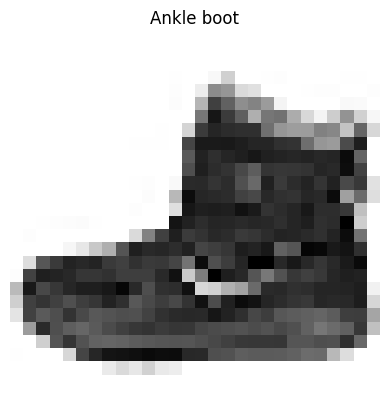

In [8]:
image, label = train_data[0]
print(f"Image shape{image.shape}")
plt.imshow(image.squeeze(), cmap="Greys")
plt.title(train_data.classes[label])
plt.axis(False)

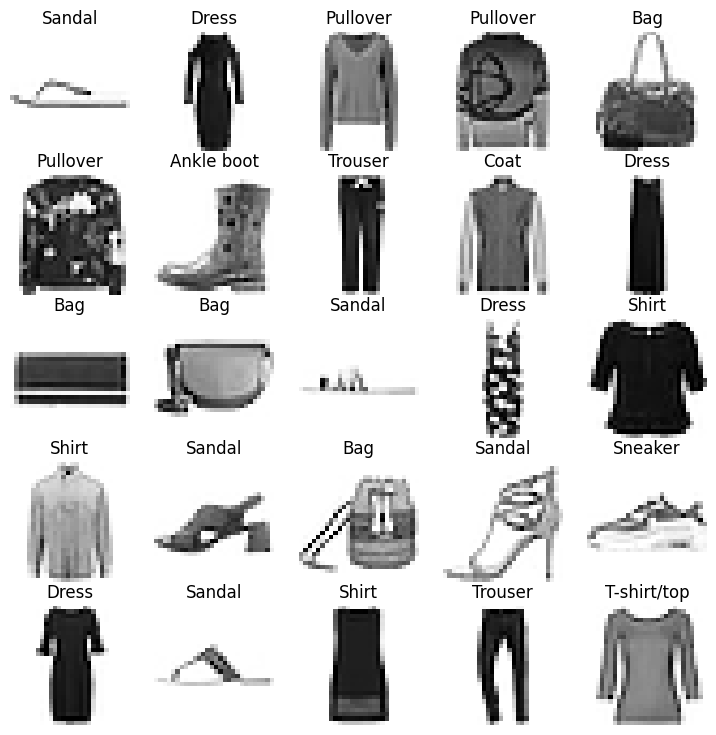

In [9]:
torch.manual_seed = 42
fig = plt.figure(figsize=(9, 9))
rows, cols = 5, 5
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="Greys")
    plt.title(train_data.classes[label])
    plt.axis(False)

### Подготовим данные 

In [10]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [11]:
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f8831e10880>,
 <torch.utils.data.dataloader.DataLoader at 0x7f8831e102e0>)

In [12]:
print(f"Dataloaders:{train_dataloader, test_dataloader}")
print(f"Lenght of train_dataloader:{len(train_dataloader)}")
print(f"Lenght of test_dataloader:{len(test_dataloader)}")

Dataloaders:(<torch.utils.data.dataloader.DataLoader object at 0x7f8831e10880>, <torch.utils.data.dataloader.DataLoader object at 0x7f8831e102e0>)
Lenght of train_dataloader:1875
Lenght of test_dataloader:313


In [13]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size:torch.Size([1, 28, 28])
Label:4


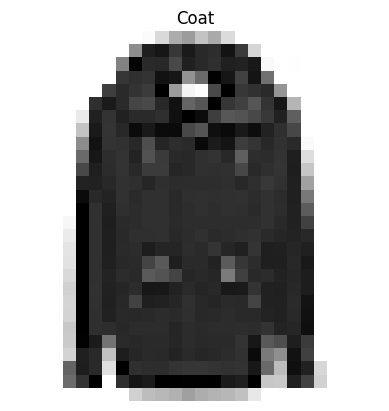

In [14]:
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
image, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(image.squeeze(), cmap="Greys")
plt.title(train_data.classes[label])
plt.axis(False)
print(f"Image size:{image.shape}")
print(f"Label:{label}")

### Создание модели

In [59]:
from numpy.ma.core import flatten_mask
flatten_model = nn.Flatten()

x = train_features_batch[0]
x.shape

output = flatten_model(x)
output.shape

torch.Size([1, 784])

In [60]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layers_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )
    def forward(self, x):
        return self.layers_stack(x).squeeze()

In [61]:
model_0 = FashionMNISTModelV0(input_shape=784,
                              hidden_units=10,
                              output_shape=len(train_data.classes))
model_0.to("cpu")
model_0

FashionMNISTModelV0(
  (layers_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [18]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0.forward(dummy_x)

tensor([-0.3590,  0.3983, -0.1844,  0.2048, -0.0842,  0.4536,  0.3379,  0.1012,
        -0.1720, -0.0293], grad_fn=<SqueezeBackward0>)

In [19]:
model_0.state_dict()

OrderedDict([('layers_stack.1.weight',
              tensor([[-0.0272, -0.0016, -0.0166,  ..., -0.0133,  0.0254, -0.0125],
                      [ 0.0172,  0.0098, -0.0212,  ...,  0.0078, -0.0033,  0.0074],
                      [-0.0307,  0.0251,  0.0010,  ...,  0.0050, -0.0340,  0.0008],
                      ...,
                      [-0.0183, -0.0170,  0.0037,  ..., -0.0196,  0.0019,  0.0321],
                      [-0.0192, -0.0283, -0.0330,  ..., -0.0201, -0.0156, -0.0169],
                      [ 0.0122, -0.0004,  0.0241,  ..., -0.0101, -0.0095, -0.0155]])),
             ('layers_stack.1.bias',
              tensor([ 0.0330,  0.0194, -0.0161, -0.0337, -0.0352,  0.0034, -0.0235, -0.0161,
                      -0.0301,  0.0338])),
             ('layers_stack.2.weight',
              tensor([[-0.0942,  0.0965,  0.0313,  0.1926,  0.2755, -0.1634,  0.0396,  0.0697,
                        0.0730,  0.2229],
                      [-0.2159,  0.2138, -0.3077,  0.0562,  0.2627, -0.2612, 

In [62]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                             lr=0.1)

In [21]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("helper_functions already exists")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("hepler_functions.py", "wb") as f:
        f.write(request.content)

In [22]:
from hepler_functions import accuracy_fn

### Создадим функцию для отслеживания скорости работы модели

In [23]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    total_time = end-start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time
start_time = timer()
def make_smth():
    return 0
for i in range(0, 10000000):
    make_smth()
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 1.272 seconds


1.271525137999987

### Создади обучающий цикл

In [63]:
from tqdm.auto import tqdm

train_time_start_om_cpu = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch{epoch}\n-------")
    train_loss = 0
    # цикл пакетной обработки
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0.forward(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 400 == 0:
            print(f"Batch {batch}: {batch * len(X)}/{len(train_dataloader.dataset)} samples")
    train_loss /= len(train_dataloader)
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model_0.forward(X_test)
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    print(f"\nTrain loss:{train_loss:.4f}|Test loss:{test_loss:.4f}|Test_acc:{test_acc:.2f}")   

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start = train_time_start_om_cpu,
                                            end = train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch0
-------
Batch 0: 0/60000 samples
Batch 400: 12800/60000 samples
Batch 800: 25600/60000 samples
Batch 1200: 38400/60000 samples
Batch 1600: 51200/60000 samples

Train loss:0.5930|Test loss:0.4967|Test_acc:82.97
Epoch1
-------
Batch 0: 0/60000 samples
Batch 400: 12800/60000 samples
Batch 800: 25600/60000 samples
Batch 1200: 38400/60000 samples
Batch 1600: 51200/60000 samples

Train loss:0.4743|Test loss:0.4911|Test_acc:82.63
Epoch2
-------
Batch 0: 0/60000 samples
Batch 400: 12800/60000 samples
Batch 800: 25600/60000 samples
Batch 1200: 38400/60000 samples
Batch 1600: 51200/60000 samples

Train loss:0.4529|Test loss:0.4834|Test_acc:82.81
Train time on cpu: 33.513 seconds


### Создадим код независящий от устройства

In [25]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Оценим модель

In [26]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X = X.to(device)
            y = y.to(device)
            y_pred = model.forward(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device="cpu")
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.49058425426483154,
 'model_acc': 82.7276357827476}

### Создадим 2 модель

In [64]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layers_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
            nn.ReLU()
        )
    def forward(self, x: torch.Tensor):
        return self.layers_stack(x)

In [65]:
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(train_data.classes)).to(device)

In [29]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [30]:
from hepler_functions import accuracy_fn
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### Функциональное обучение и улучшение циклов обучения и тестирования

In [66]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               optimizer: torch.optim.Optimizer,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    train_loss = 0
    train_acc = 0
    model.train()
    for batch, (X, y) in enumerate(data_loader):
        X = X.to(device)
        y = y.to(device)
        y_pred = model.forward(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 400 == 0:
            print(f"Batch {batch}: {batch* len(X)}/{len(data_loader.dataset)}samples.")
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss:{train_loss:.5f}|Train acc:{train_acc:.2f}%")

In [32]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for batch, (X, y) in enumerate(data_loader):
            X = X.to(device)
            y = y.to(device)
            test_pred = model.forward(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                 y_pred=test_pred.argmax(dim=1))
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss:{test_loss:.5f}|Test acc:{test_acc:.2f}%\n")

In [67]:
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch:{epoch}\n---------")
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end = train_time_end_on_gpu,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
---------
Batch 0: 0/60000samples.
Batch 400: 12800/60000samples.
Batch 800: 25600/60000samples.
Batch 1200: 38400/60000samples.
Batch 1600: 51200/60000samples.
Train loss:2.30583|Train acc:10.04%
Test loss:2.30599|Test acc:10.05%

Epoch:1
---------
Batch 0: 0/60000samples.
Batch 400: 12800/60000samples.
Batch 800: 25600/60000samples.
Batch 1200: 38400/60000samples.
Batch 1600: 51200/60000samples.
Train loss:2.30583|Train acc:10.04%
Test loss:2.30599|Test acc:10.05%

Epoch:2
---------
Batch 0: 0/60000samples.
Batch 400: 12800/60000samples.
Batch 800: 25600/60000samples.
Batch 1200: 38400/60000samples.
Batch 1600: 51200/60000samples.
Train loss:2.30583|Train acc:10.04%
Test loss:2.30599|Test acc:10.05%

Train time on cuda: 34.897 seconds


In [34]:
total_train_time_model_1

52.77744217100002

In [35]:
model_1_results = eval_model(model=model_1,
                              data_loader=test_dataloader,
                              loss_fn=loss_fn,
                              accuracy_fn=accuracy_fn,
                              device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [36]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6682568192481995,
 'model_acc': 77.16653354632588}

In [37]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.49058425426483154,
 'model_acc': 82.7276357827476}

### Сверточная нейронная сеть

In [38]:
class FashionMNISTModelV2(nn.Module):
    """
    Модель основана на архитектуре TinyVGG
    """
    def __init__(self, 
                 input_shape,
                 hidden_units,
                 output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7 * 7,
                      out_features=output_shape)
        )
    def forward(self, x):
        x = self.conv_block_1(x)
        #print(f"Output shape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x)
        #print(f"Output shape of conv_block_2: {x.shape}")
        x = self.classifier(x)
        #print(f"Output shape of classifier: {x.shape}")
        return x

In [39]:

model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(train_data.classes)).to(device)

### Пошаговое прохождение Con2d и MaxPool2d

In [40]:
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]
print(f"Image batch shape: {image.shape}")
print(f"Single image shape: {test_image.shape}")


Image batch shape: torch.Size([1, 28, 28])
Single image shape: torch.Size([3, 64, 64])


In [41]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 62, 62])

In [42]:
test_image.shape

torch.Size([3, 64, 64])

In [43]:
max_pool_layer = nn.MaxPool2d(kernel_size=(3, 3))

test_image_throught_conv = conv_layer(test_image.unsqueeze(dim=0))

print(f"Shape after going throught conv_layer(): {test_image_throught_conv.shape}")

test_image_throught_conv_and_max_pool = max_pool_layer(test_image_throught_conv)

print(f"Shape after going throught conv_layer() and max_pool_layer(): {test_image_throught_conv_and_max_pool.shape}")

Shape after going throught conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going throught conv_layer() and max_pool_layer(): torch.Size([1, 10, 20, 20])


In [44]:
torch.manual_seed = 42

random_tensor = torch.rand(size=(1, 1, 4, 4))
print(f"random_tensor: {random_tensor.shape}")
max_pool_layer = nn.MaxPool2d(kernel_size=(2, 2))
max_pool_tensor = max_pool_layer(random_tensor)
print(f"max_pool_tensor: {max_pool_tensor.shape}")

print(f"random tensor: \n {random_tensor}")
print(f"max_pool_tensor: \n {max_pool_tensor}")

random_tensor: torch.Size([1, 1, 4, 4])
max_pool_tensor: torch.Size([1, 1, 2, 2])
random tensor: 
 tensor([[[[0.8867, 0.5036, 0.2447, 0.4972],
          [0.0872, 0.2216, 0.2154, 0.4137],
          [0.4185, 0.2372, 0.5742, 0.9130],
          [0.8644, 0.0663, 0.8028, 0.3656]]]])
max_pool_tensor: 
 tensor([[[[0.8867, 0.4972],
          [0.8644, 0.9130]]]])


### отладка

In [45]:
image = image.to(device)

model_2.forward(image.unsqueeze(0))

tensor([[ 0.0507,  0.0211,  0.0672,  0.0221, -0.0333, -0.0226, -0.0047, -0.0251,
         -0.0269, -0.0577]], device='cuda:0', grad_fn=<AddmmBackward0>)

### Обучим сверточную нейронную сеть

In [46]:
from hepler_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [68]:
torch.manual_seed = 42
torch.cuda.manual_seed = 42

from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----------------------")
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------------------
Batch 0: 0/60000samples.
Batch 400: 12800/60000samples.
Batch 800: 25600/60000samples.
Batch 1200: 38400/60000samples.
Batch 1600: 51200/60000samples.
Train loss:0.27075|Train acc:90.20%
Test loss:0.31619|Test acc:88.74%

Epoch: 1
----------------------
Batch 0: 0/60000samples.
Batch 400: 12800/60000samples.
Batch 800: 25600/60000samples.
Batch 1200: 38400/60000samples.
Batch 1600: 51200/60000samples.
Train loss:0.27075|Train acc:90.20%
Test loss:0.31619|Test acc:88.74%

Epoch: 2
----------------------
Batch 0: 0/60000samples.
Batch 400: 12800/60000samples.
Batch 800: 25600/60000samples.
Batch 1200: 38400/60000samples.
Batch 1600: 51200/60000samples.
Train loss:0.27075|Train acc:90.20%
Test loss:0.31619|Test acc:88.74%

Train time on cuda: 39.723 seconds


In [69]:
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3161856532096863,
 'model_acc': 88.73801916932908}

In [70]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])

In [71]:
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

In [72]:
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.490584,82.727636,33.512919
1,FashionMNISTModelV1,0.668257,77.166534,34.896639
2,FashionMNISTModelV2,0.316186,88.738019,39.723186


Text(0, 0.5, 'model')

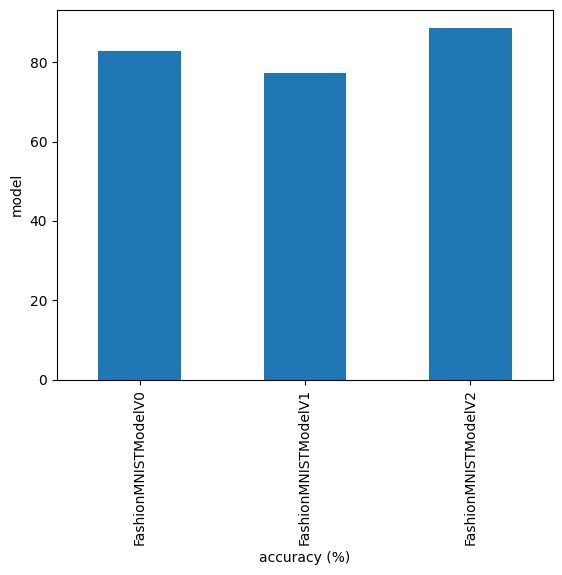

In [75]:
compare_results.set_index("model_name")["model_acc"].plot(kind="bar")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

In [76]:
plt.figure(figsize=(9, 9))


<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>